In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt

In [2]:
movies_df = pd.read_csv("../data/movies_metadata_cleaned.csv")
ratings_df = pd.read_csv("../data/ratings_small.csv")

## Distribution of movies across geners

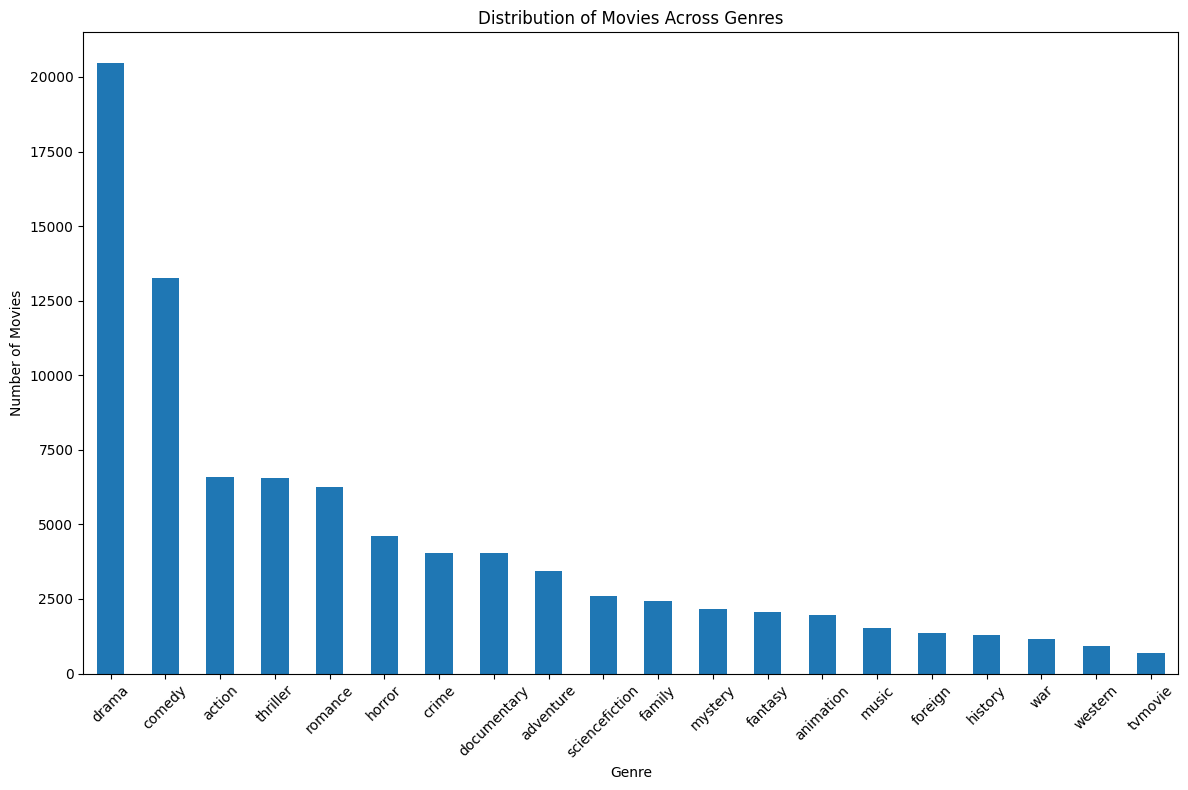

In [3]:
movies_df["genres"] = movies_df["genres"].apply(ast.literal_eval)
genre_list = sum(movies_df["genres"], [])
genre_count = pd.Series(genre_list).value_counts()

plt.figure(figsize=(12, 8))
genre_count.plot(kind="bar")
plt.title("Distribution of Movies Across Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Revenue vs Budget

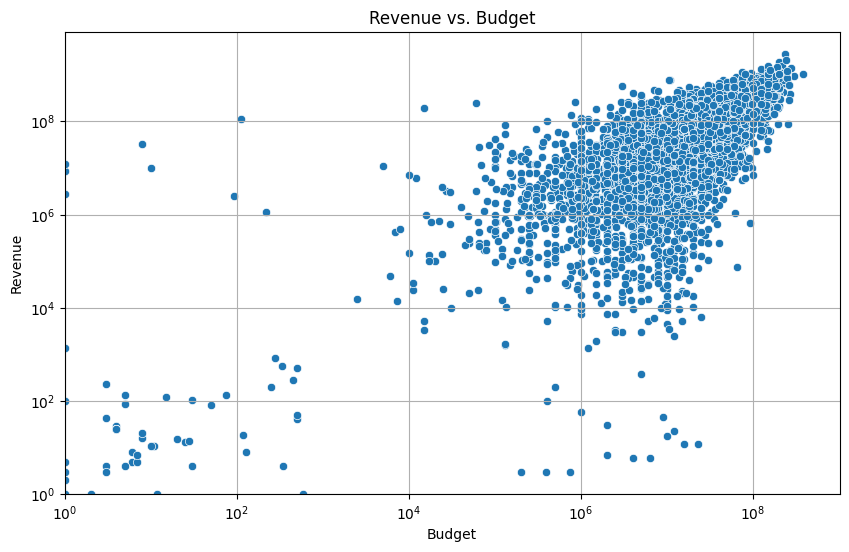

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x="budget", y="revenue")
plt.title("Revenue vs. Budget")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.xscale("log")
plt.yscale("log")
plt.xlim(left=1)
plt.ylim(bottom=1)
plt.grid(True)
plt.show()

## Distribution of Movies Over the years

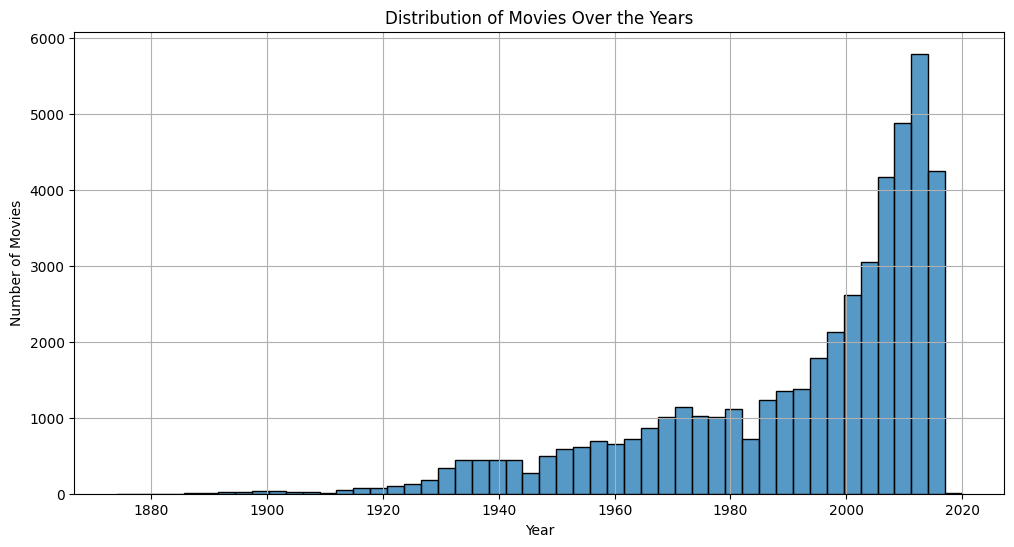

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(movies_df["year"], bins=50, kde=False)
plt.title("Distribution of Movies Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

## Distrubtion of languages in movies

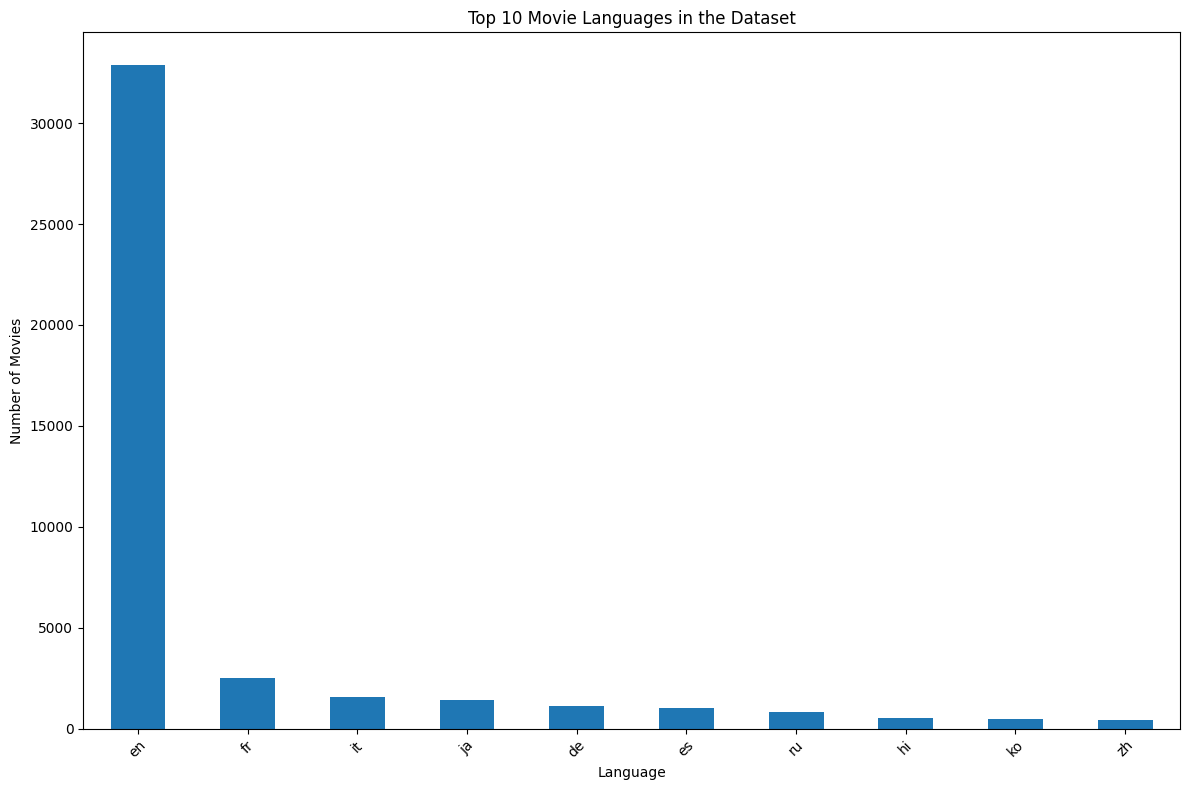

In [6]:
language_count = (
    movies_df["original_language"].value_counts().head(10)
)  # Top 10 languages
plt.figure(figsize=(12, 8))
language_count.plot(kind="bar")
plt.title("Top 10 Movie Languages in the Dataset")
plt.xlabel("Language")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation heat map

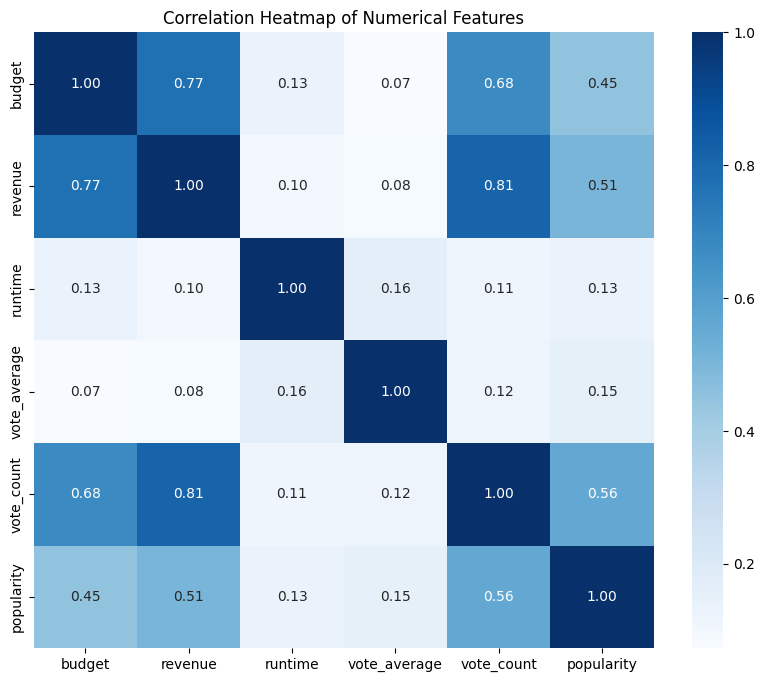

In [7]:
numerical_features = movies_df[
    ["budget", "revenue", "runtime", "vote_average", "vote_count", "popularity"]
]
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [8]:
from collections import Counter

movies_df["cast"] = movies_df["cast"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
movies_df["keywords"] = movies_df["keywords"].apply(ast.literal_eval)

actor_list = sum(movies_df["cast"], [])
actor_counts = Counter(actor_list)

top_actors = pd.DataFrame(actor_counts.most_common(10), columns=["Actor", "Movies"])
top_actors.set_index("Actor", inplace=True)

top_directors = movies_df["director"].value_counts().head(10)

## Top 10 actors by the number of appearances in movies

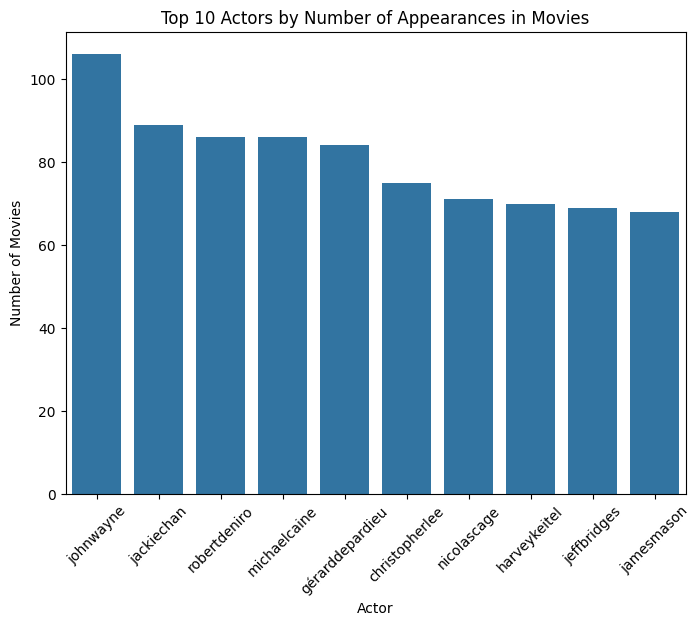

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(top_actors["Movies"])
plt.title("Top 10 Actors by Number of Appearances in Movies")
plt.xlabel("Actor")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

## Top 10 directors by the number of movies directed

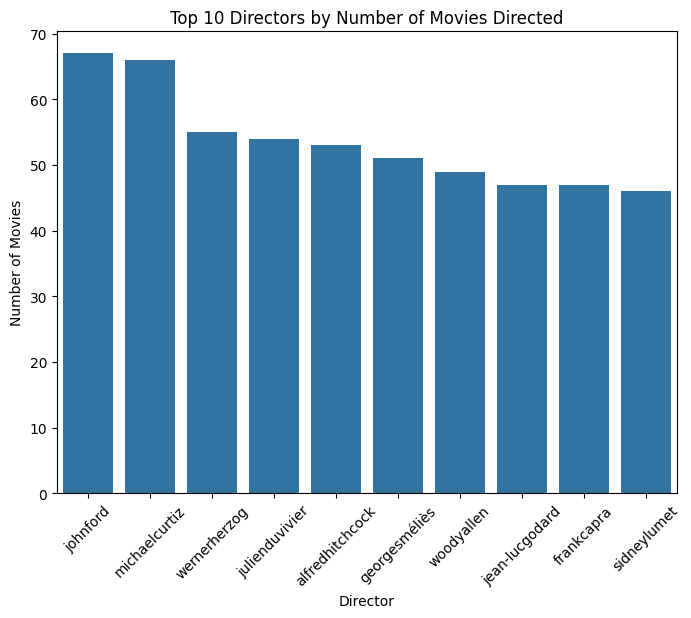

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(top_directors)
plt.title("Top 10 Directors by Number of Movies Directed")
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

## Distribution of Ratings

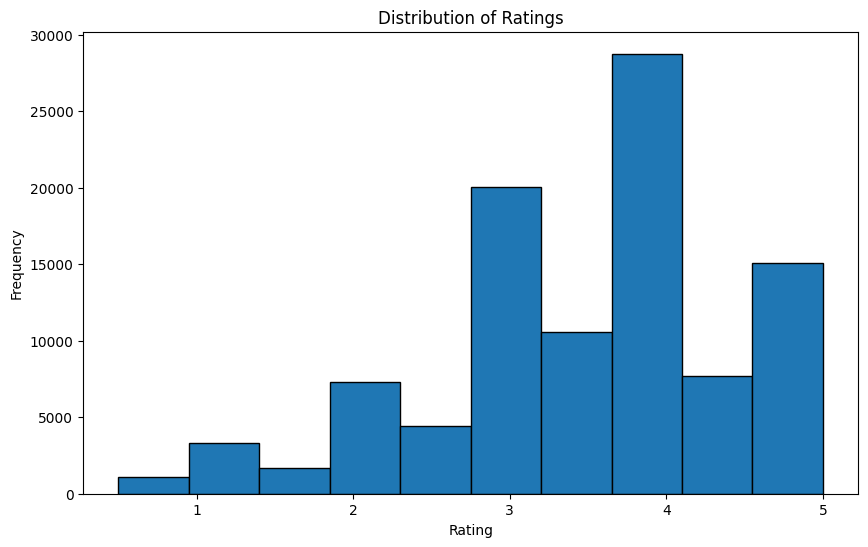

Mean Rating: 3.543608255669773
Median Rating: 4.0


In [11]:
plt.figure(figsize=(10, 6))
plt.hist(ratings_df["rating"], bins=10, edgecolor="black")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

mean_rating = ratings_df["rating"].mean()
median_rating = ratings_df["rating"].median()

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")

In [12]:
movies_df.to_csv("../data/movies_metadata_after_eda.csv", index=False)